### 1. Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from sklearn.metrics import (
    f1_score,
    precision_score,
    recall_score
)
from sklearn.model_selection import train_test_split
from utils.utils import plot_confusion_matrix, split_data

### 2. Loading the dataset

In [2]:
#load dataset
dataset = pd.read_csv('../dataset/dataset_final.csv')

# refactor values in filepath column added ../ to the path
dataset['Filepath'] = dataset['Filepath'].apply(lambda x: '../' + x)

dataset.head()

,Filepath,Label
0,../dataset/Positive/07045.jpg,POSITIVE
1,../dataset/Positive/09452.jpg,POSITIVE
2,../dataset/Positive/19030_1.jpg,POSITIVE
3,../dataset/Negative/06463.jpg,NEGATIVE
4,../dataset/Positive/12625_1.jpg,POSITIVE


### 3. Preparing the data

In [3]:
train_df, test_df = train_test_split(
    dataset.sample(frac=1.0, random_state=42),
    train_size=0.80,
    random_state=42,
)

In [4]:
train_data, validation_data, test_data = split_data(train_df, test_df)

Found 25600 validated image filenames belonging to 2 classes.


Found 6400 validated image filenames belonging to 2 classes.
Found 8000 validated image filenames belonging to 2 classes.


### 4. Loading the InceptionV3 model

In [5]:
model = tf.keras.models.load_model('./models/trained/inception_model.h5')

model.summary()

2024-04-10 14:15:19.681435: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-10 14:15:19.714099: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 227, 227, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 113, 113, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 113, 113, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 113, 113, 32)         0         ['batch_normalization[0][0

### 5. Making predictions

In [6]:
y_pred = np.squeeze(model.predict(test_data) >= 0.5).astype(np.int32)

250/250 [==============================] - 88s 349ms/step


In [7]:
x = f1_score(y_true=test_data.labels, y_pred=y_pred)
y = precision_score(y_true=test_data.labels, y_pred=y_pred)
z = recall_score(y_true=test_data.labels, y_pred=y_pred)

In [8]:
print(f'F1 Score: {round(x*100,2)}%')
print(f'Precision Score: {round(y*100,2)}%')
print(f'Recall Score: {round(z*100,2)}%')

F1 Score: 99.96%
Precision Score: 99.98%
Recall Score: 99.95%


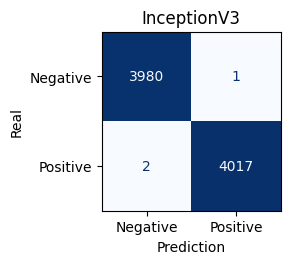

In [9]:
disp = plot_confusion_matrix(test_data.labels, y_pred, title = 'InceptionV3')

plt.show()

In [10]:
disp.figure_.savefig('./models/figures/inceptionv3/inceptionv3_confusion_matrix_final.eps')
disp.figure_.savefig('./models/figures/inceptionv3/inceptionv3_confusion_matrix_final.png')

### 6. Evaluating the model

In [11]:
loss, acc = model.evaluate(test_data)

250/250 [==============================] - 87s 343ms/step - loss: 0.0036 - accuracy: 0.9996


In [12]:
print(f'acc: {round(acc*100,2)}%')
print(f'loss: {loss}' )

acc: 99.96%
loss: 0.003552887588739395


In [13]:
import pickle
# loading model's history
with open('./models/historys/inception_model_history', 'rb') as f:
    history = pickle.load(f)

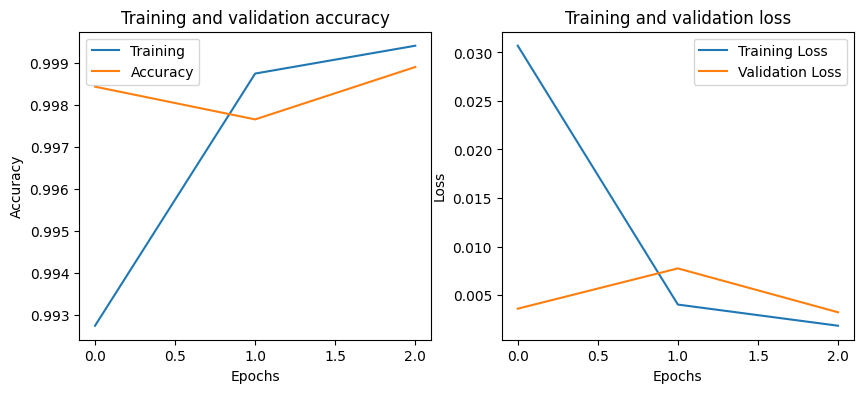

In [19]:
plt.figure(figsize = (10, 4))

plt.subplot(1, 2, 1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training", "Accuracy"])

plt.subplot(1, 2, 2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training Loss", "Validation Loss"])

plt.savefig('./models/figures/inceptionv3/inception_curves.jpg')

plt.show()